# Plying with Pandas

Inspiration and some of the parts came from: Python Data Science [GitHub repository](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master), [MIT License](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/LICENSE-CODE) and [Introduction to Pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb) by Google, [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0)

needed packages:
 * pandas
 * numpy

support package
 * seaborn (load dataset titanic from seaborn package)
 * pivottablejs (for more easy pivot tables and fast simple visualization)
 * watermark (documenting version of packages)

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install seaborn
!pip install watermark
#!pip install pivottablejs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.6 MB/s eta 0:00:00


## Intro to pandas


[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Learning Objectives:

 * Gain an introduction to the *DataFrame* and *Series* data structures of the pandas library

 * Import CSV data into a pandas *DataFrame*

 * Access and manipulate data within a *DataFrame* and *Series*

 * Export *DataFrame* to CSV
---
 * operations
  * selection
  * filtering
  * concat
  * NaNs
---
 * descriptive statistics/EDA
 * corr matrix
---
 * Simple plotting from *DataFrame*

 * Pivot tables

# Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [2]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.5.3'

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [3]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.head()
#california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# Exploring Data

## EDA

But most of the time, you load an entire file into a `DataFrame`. And you need to explore your data. The example below `DataFrame.describe` is useful to show interesting statistics about a `DataFrame`.

In [4]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [5]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Or `DataFrame.tail`, which displays the last few records of a `DataFrame`:

In [6]:
california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


In [7]:
california_housing_dataframe.median_income.describe()

count    17000.000000
mean         3.883578
std          1.908157
min          0.499900
25%          2.566375
50%          3.544600
75%          4.767000
max         15.000100
Name: median_income, dtype: float64

In [8]:
california_housing_dataframe.median_income.min()

0.4999

In [9]:
california_housing_dataframe.median_income.max()

15.0001

In [10]:
california_housing_dataframe.median_income.quantile(0.7)

4.4630399999999995

### Exercise
Use the `.head()`, `.tail()` and `.describe()` functions on the cleaned Penguin dataset to learn insights.

## Correletaion Matrix

In [11]:
# df_shape = pd.read_csv('blobs_statistics.csv')

In [ ]:
df_shape = pd.read_csv('../../data/blobs_statistics.csv')
df_shape.head()

In [24]:
df_shape.corr


<bound method DataFrame.corr of     Unnamed: 0  area  mean_intensity  minor_axis_length  major_axis_length  \
0            0   422      192.379147          16.488550          34.566789   
1            1   182      180.131868          11.736074          20.802697   
2            2   661      205.216339          28.409502          30.208433   
3            3   437      216.585812          23.143996          24.606130   
4            4   476      212.302521          19.852882          31.075106   
..         ...   ...             ...                ...                ...   
56          56   211      185.061611          14.522762          18.489138   
57          57    78      185.230769           6.028638          17.579799   
58          58    86      183.720930           5.426871          21.261427   
59          59    51      190.431373           5.032414          13.742079   
60          60    46      175.304348           3.803982          15.948714   

    eccentricity    extent  fer

It can be ahrd to read in numeric format. I wonder if there is beter way how to look at the data?

<Axes: >

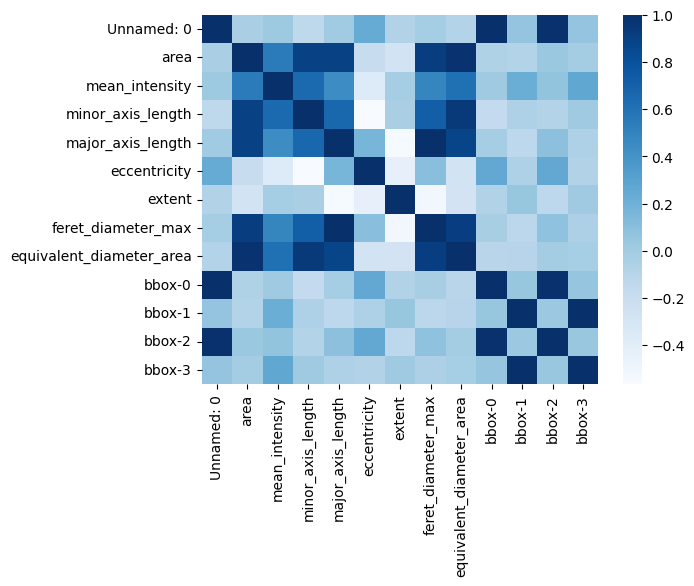

In [27]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = df_shape.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=False)

**Watermark**

In [28]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,seaborn,pivottablejs"))

Last updated: 2023-08-15T07:14:49.314940+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.109+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

watermark   : 2.4.3
numpy       : 1.23.5
pandas      : 1.5.3
seaborn     : 0.12.2
pivottablejs: not installed

